<a href="https://colab.research.google.com/github/twyeh/solid-state-physics/blob/main/free_electron_BCC%2CFCC%2C_Simple_Cubic%E4%B8%89%E7%A8%AE%E6%99%B6%E6%A0%BC%E5%B0%8D%E6%87%89%E7%9A%84%E5%B8%83%E9%87%8C%E6%B7%B5%E5%9C%96%E5%8F%8A%E8%83%BD%E8%AD%9C%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:61: SyntaxWarning: invalid escape sequence '\p'
<>:62: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:61: SyntaxWarning: invalid escape sequence '\p'
<>:62: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3375332090.py:60: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('k$_x$ ($\pi/a$ units)')
/tmp/ipython-input-3375332090.py:61: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('k$_y$ ($\pi/a$ units)')
/tmp/ipython-input-3375332090.py:62: SyntaxWarning: invalid escape sequence '\p'
  ax.set_zlabel('k$_z$ ($\pi/a$ units)')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20498 (\N{CJK UNIFIED IDEOGRAPH-5012}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH

--- 正在繪製 SC 晶格的布里淵區高對稱點 ---


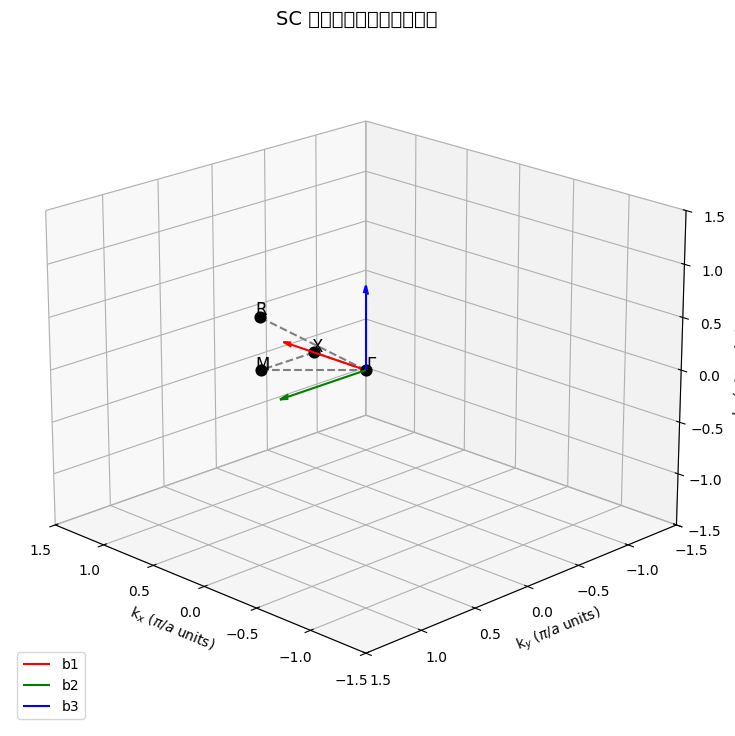

--- 正在繪製 FCC 晶格的布里淵區高對稱點 ---


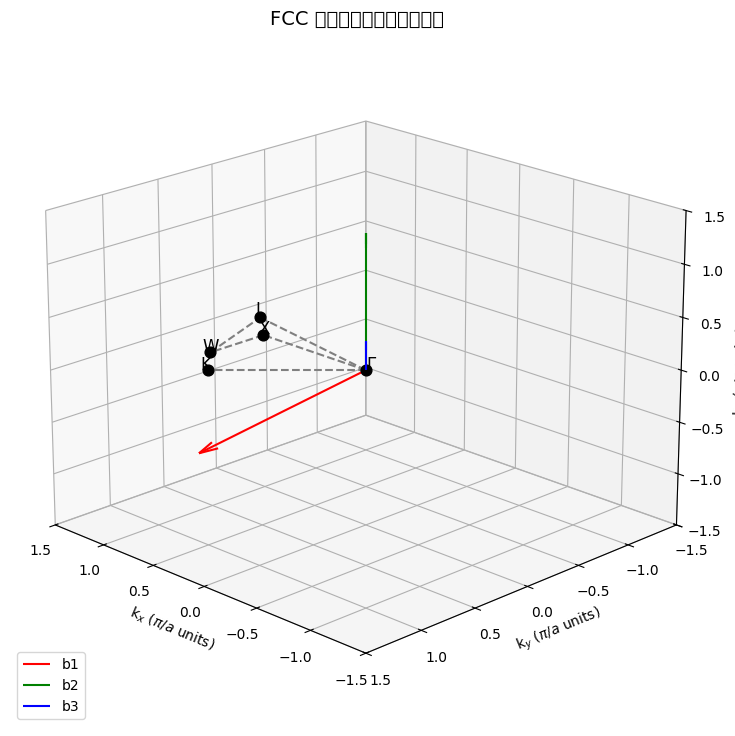

--- 正在繪製 BCC 晶格的布里淵區高對稱點 ---


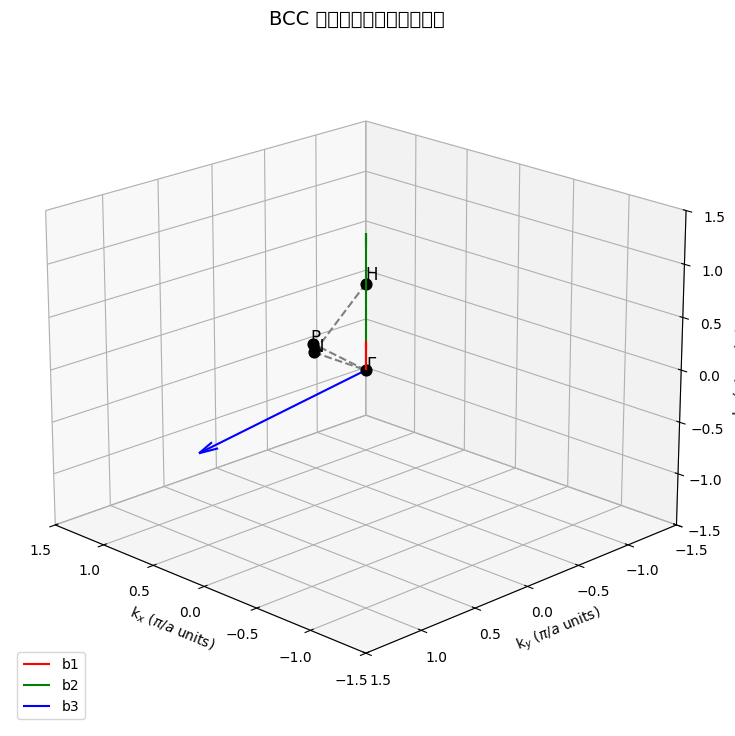

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------------------------------------
# 1. 核心繪圖函式：繪製 BZ 高對稱點
# -----------------------------------------------------------

def plot_brillouin_zone_points(lattice_type):
    """
    繪製特定晶格的倒格基矢與布里淵區高對稱點。

    Args:
        lattice_type (str): 'SC', 'FCC', 或 'BCC'。
    """
    print(f"--- 正在繪製 {lattice_type} 晶格的布里淵區高對稱點 ---")

    # --- 1. 定義倒格基矢與高對稱點（以 2*pi/a 為單位）---
    if lattice_type == 'SC':
        b1, b2, b3 = np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])
        points_map = {
            r'$\Gamma$': np.array([0, 0, 0]), 'X': np.array([0.5, 0, 0]),
            'M': np.array([0.5, 0.5, 0]), 'R': np.array([0.5, 0.5, 0.5])
        }
        path_names = [r'$\Gamma$', 'X', 'M', r'$\Gamma$', 'R']

    elif lattice_type == 'FCC':
        # FCC 的倒格基矢（倒格是 BCC 類型）
        b1, b2, b3 = np.array([1, 1, -1]), np.array([1, -1, 1]), np.array([-1, 1, 1])
        points_map = {
            r'$\Gamma$': np.array([0, 0, 0]), 'X': np.array([1, 0, 0]),
            'L': np.array([0.5, 0.5, 0.5]), 'K': np.array([0.75, 0.75, 0]),
            'W': np.array([1, 0.5, 0])
        }
        path_names = [r'$\Gamma$', 'X', 'W', 'L', r'$\Gamma$', 'K']

    elif lattice_type == 'BCC':
        # BCC 的倒格基矢（倒格是 FCC 類型）
        b1, b2, b3 = np.array([-1, 1, 1]), np.array([1, -1, 1]), np.array([1, 1, -1])
        points_map = {
            r'$\Gamma$': np.array([0, 0, 0]), 'H': np.array([0.5, -0.5, 0.5]),
            'P': np.array([0.25, 0.25, 0.25]), 'N': np.array([0.5, 0, 0])
        }
        path_names = [r'$\Gamma$', 'H', 'N', r'$\Gamma$', 'P']

    else:
        print("錯誤：無效的晶格類型。")
        return

    # --- 2. 繪圖設置 ---
    fig = plt.figure(figsize=(9, 9))
    # 建立 3D 投影軸
    ax = fig.add_subplot(111, projection='3d')

    # 設置軸範圍 (基於 2*pi/a 的單位)
    limit = 1.5
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([-limit, limit])
    ax.set_xlabel('k$_x$ ($\pi/a$ units)')
    ax.set_ylabel('k$_y$ ($\pi/a$ units)')
    ax.set_zlabel('k$_z$ ($\pi/a$ units)')
    ax.set_title(f'{lattice_type} 晶格倒格空間與高對稱點', fontsize=14)

    # --- 3. 繪製倒格基矢 ---
    # 繪製從原點出發的 b1, b2, b3 向量
    for b_vec, color, label in zip([b1, b2, b3], ['r', 'g', 'b'], ['b1', 'b2', 'b3']):
        ax.quiver(0, 0, 0, b_vec[0], b_vec[1], b_vec[2],
                  color=color, length=0.8, normalize=False, arrow_length_ratio=0.1, label=label)

    # --- 4. 繪製高對稱點 ---
    for name, pos in points_map.items():
        # 繪製點
        ax.scatter(pos[0], pos[1], pos[2], marker='o', s=60, c='k')
        # 標註點的名稱，稍微偏移避免重疊
        ax.text(pos[0] * 1.05, pos[1] * 1.05, pos[2] * 1.05, name, fontsize=12, color='k')

    # --- 5. 繪製能帶計算路徑 ---
    # 沿著高對稱點連接虛線，模擬能帶計算的路徑
    current_point = points_map[path_names[0]]
    for i in range(1, len(path_names)):
        next_point = points_map[path_names[i]]
        ax.plot([current_point[0], next_point[0]],
                [current_point[1], next_point[1]],
                [current_point[2], next_point[2]],
                c='grey', linestyle='--', linewidth=1.5)
        current_point = next_point

    # 設置視角，讓圖形更清晰
    ax.view_init(elev=20, azim=135)
    plt.legend(loc='lower left')
    plt.show()

# -----------------------------------------------------------
# 2. 執行繪圖
# -----------------------------------------------------------

plot_brillouin_zone_points('SC')
plot_brillouin_zone_points('FCC')
plot_brillouin_zone_points('BCC')

--- 正在計算 SC 晶格 ---
生成的倒格向量數量 (G_max_coeff=3): 343


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26230 (\N{CJK UNIFIED IDEOGRAPH-6676}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24118 (\N{CJK UNIFIED IDEOGRAPH-5E36}) missing from font(s) DejaVu Sans.
  fig.canvas

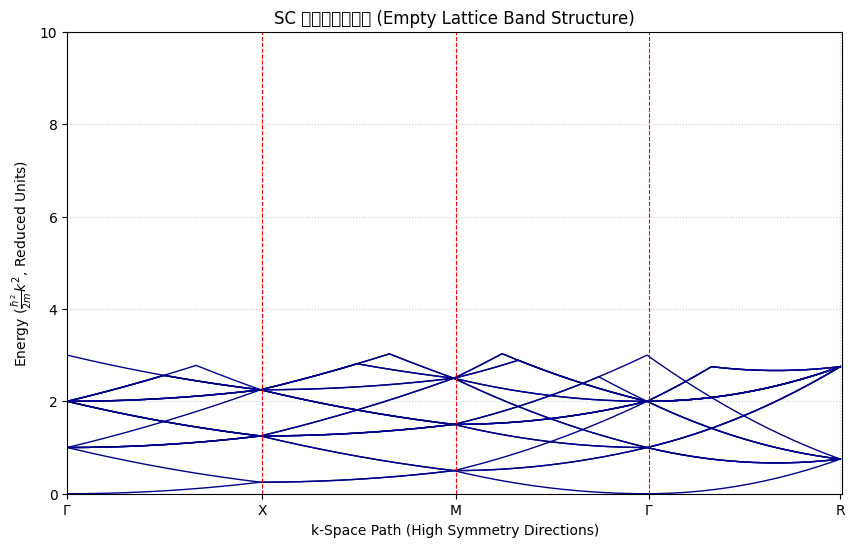

--- 正在計算 FCC 晶格 ---
生成的倒格向量數量 (G_max_coeff=2): 125


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26230 (\N{CJK UNIFIED IDEOGRAPH-6676}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24118 (\N{CJK UNIFIED IDEOGRAPH-5E36}) missing from font(s) DejaVu Sans.
  fig.canvas

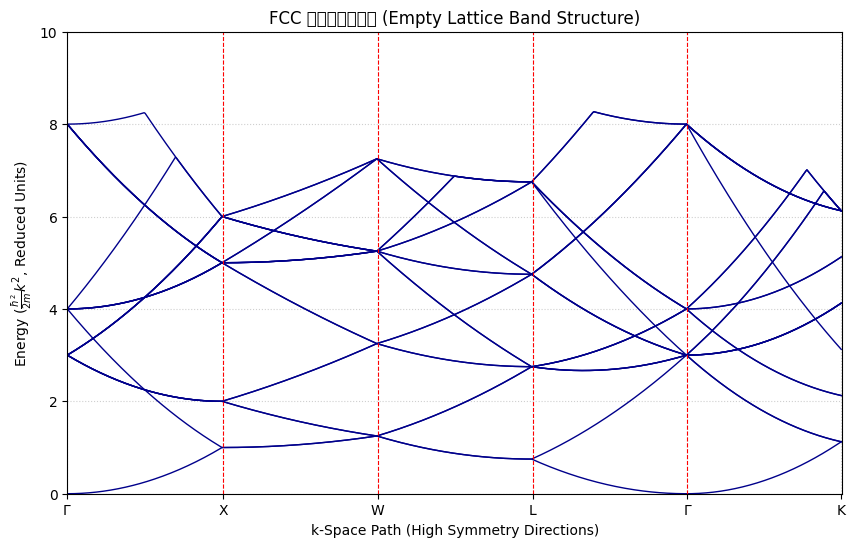

--- 正在計算 BCC 晶格 ---
生成的倒格向量數量 (G_max_coeff=2): 125


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26230 (\N{CJK UNIFIED IDEOGRAPH-6676}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24118 (\N{CJK UNIFIED IDEOGRAPH-5E36}) missing from font(s) DejaVu Sans.
  fig.canvas

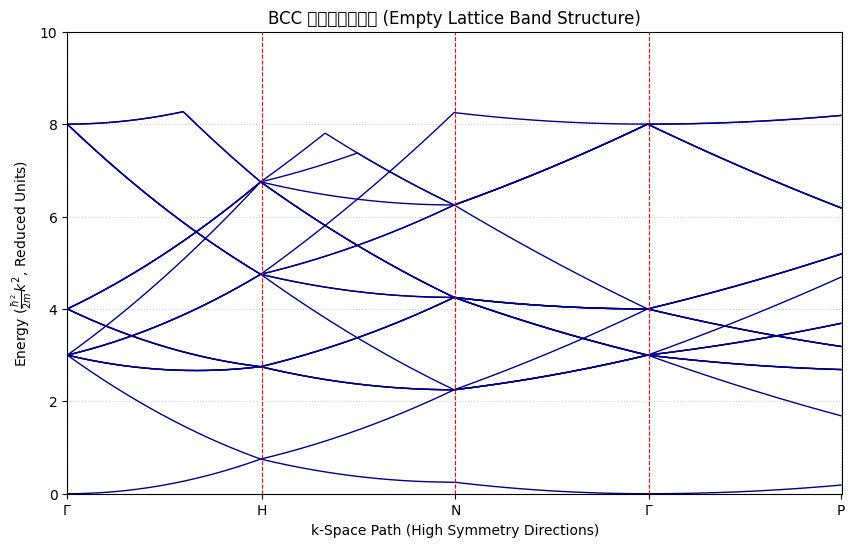

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. 核心函式：計算能帶能量
# -----------------------------------------------------------

def calculate_empty_band(k_vector, G_vectors):
    """
    計算 k 向量處，所有選定倒格向量 G 上的能帶能量。
    我們使用約化單位：hbar^2 / (2m) = 1，(2*pi/a)^2 = 1
    所以 E(k) = |k + G|^2

    Args:
        k_vector (np.array): k 空間座標 (3D)。
        G_vectors (np.array): 倒格向量的列表。

    Returns:
        list: 該 k 點上所有能帶的能量值。
    """
    energies = []
    for G in G_vectors:
        # 計算向量 k+G 的平方模
        E = np.sum((k_vector + G)**2)
        energies.append(E)
    return energies

def get_path_points(start, end, num_steps):
    """
    在 k 空間中兩點之間生成線性插值的點。
    """
    # np.linspace 生成 num_steps 個點，包括起點和終點
    return np.linspace(start, end, num_steps, endpoint=True)

# -----------------------------------------------------------
# 2. 晶格定義與計算
# -----------------------------------------------------------

def plot_empty_lattice_bands(lattice_type, G_max_coeff=2, steps_per_segment=100):
    """
    計算並繪製特定晶格的空晶格能帶圖。

    Args:
        lattice_type (str): 'SC', 'FCC', 或 'BCC'。
        G_max_coeff (int): 限制倒格向量 G 的最大係數 (n1, n2, n3 範圍)。
        steps_per_segment (int): 每個高對稱路徑段的 k 點數量。
    """
    print(f"--- 正在計算 {lattice_type} 晶格 ---")

    # 設置倒格基矢 (b1, b2, b3) - 以 2*pi/a 為單位
    if lattice_type == 'SC':
        # SC: 實格和倒格都是立方體
        b1, b2, b3 = np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])
        # SC 高對稱點 (Brillouin Zone Vertices)
        points = {
            r'$\Gamma$': np.array([0, 0, 0]),
            'X': np.array([0.5, 0, 0]),
            'M': np.array([0.5, 0.5, 0]),
            'R': np.array([0.5, 0.5, 0.5])
        }
        path_segments = [(r'$\Gamma$', 'X'), ('X', 'M'), ('M', r'$\Gamma$'), (r'$\Gamma$', 'R')]

    elif lattice_type == 'FCC':
        # FCC: 倒格是 BCC
        b1, b2, b3 = np.array([1, 1, -1]), np.array([1, -1, 1]), np.array([-1, 1, 1])
        # FCC 高對稱點 (以 2*pi/a 為單位)
        points = {
            r'$\Gamma$': np.array([0, 0, 0]),
            'X': np.array([1, 0, 0]),
            'L': np.array([0.5, 0.5, 0.5]),
            'K': np.array([0.75, 0.75, 0]),
            'W': np.array([1, 0.5, 0])
        }
        path_segments = [(r'$\Gamma$', 'X'), ('X', 'W'), ('W', 'L'), ('L', r'$\Gamma$'), (r'$\Gamma$', 'K')]

    elif lattice_type == 'BCC':
        # BCC: 倒格是 FCC
        b1, b2, b3 = np.array([-1, 1, 1]), np.array([1, -1, 1]), np.array([1, 1, -1])
        # BCC 高對稱點 (以 2*pi/a 為單位)
        points = {
            r'$\Gamma$': np.array([0, 0, 0]),
            'H': np.array([0.5, -0.5, 0.5]),
            'P': np.array([0.25, 0.25, 0.25]),
            'N': np.array([0.5, 0, 0])
        }
        # BCC 標準路徑通常為：G -> H -> N -> G -> P
        path_segments = [(r'$\Gamma$', 'H'), ('H', 'N'), ('N', r'$\Gamma$'), (r'$\Gamma$', 'P')]

    else:
        raise ValueError("Invalid lattice type. Choose 'SC', 'FCC', or 'BCC'.")

    # --- 1. 生成倒格向量 G ---
    G_vectors = []
    # 遍歷 n1, n2, n3 係數
    for n1 in range(-G_max_coeff, G_max_coeff + 1):
        for n2 in range(-G_max_coeff, G_max_coeff + 1):
            for n3 in range(-G_max_coeff, G_max_coeff + 1):
                # G = n1*b1 + n2*b2 + n3*b3
                G = n1 * b1 + n2 * b2 + n3 * b3
                G_vectors.append(G)

    G_vectors = np.array(G_vectors)
    print(f"生成的倒格向量數量 (G_max_coeff={G_max_coeff}): {len(G_vectors)}")

    # --- 2. 構建 k 空間路徑與計算能帶 ---
    k_path = []
    path_ticks = [0]
    tick_labels = [path_segments[0][0]]
    total_distance = 0

    for i, (start_name, end_name) in enumerate(path_segments):
        start_point = points[start_name]
        end_point = points[end_name]

        # 獲取路徑點，如果不是第一個段，則不重複起點
        segment_points = get_path_points(start_point, end_point, steps_per_segment)
        if i > 0:
            segment_points = segment_points[1:]

        # 累積路徑距離用於繪圖 X 軸
        distance = np.linalg.norm(end_point - start_point)
        total_distance += distance

        # 紀錄高對稱點標記
        if i > 0:
            path_ticks.append(path_ticks[-1] + distance * steps_per_segment / (len(segment_points) + 1) ) # 粗略的 X 軸距離
        path_ticks.append(path_ticks[-1] + len(segment_points))
        tick_labels.append(end_name)

        k_path.extend(segment_points)

    all_bands = []
    for k in k_path:
        # 對每個 k 點計算所有能帶能量
        E_k_bands = calculate_empty_band(k, G_vectors)
        all_bands.append(E_k_bands)

    all_bands = np.array(all_bands)

    # --- 3. 繪圖 ---
    plt.figure(figsize=(10, 6))

    # X 軸座標
    x_axis = np.arange(len(k_path))

    # 繪製能帶
    # 排序能量，確保能帶是連續的 (這對於空晶格至關重要)
    sorted_bands = np.sort(all_bands, axis=1)

    # 繪製前 N 條能帶 (例如 20 條)
    num_bands_to_plot = min(20, sorted_bands.shape[1])
    for i in range(num_bands_to_plot):
        plt.plot(x_axis, sorted_bands[:, i], color='darkblue', linewidth=1)

    # 標記高對稱點

    # 找到實際的刻度位置 (需要稍微調整以匹配 path_ticks 的長度)
    segment_lengths = [len(get_path_points(points[s], points[e], steps_per_segment)[1:]) if i > 0 else len(get_path_points(points[s], points[e], steps_per_segment))
                       for i, (s, e) in enumerate(path_segments)]

    # 計算實際的 X 軸標記位置
    tick_pos = [0]
    for length in segment_lengths[:-1]:
        tick_pos.append(tick_pos[-1] + length)
    tick_pos.append(len(k_path) - 1) # 修正終點位置

    # 繪製垂直分隔線
    for pos in tick_pos[1:-1]:
        plt.axvline(x=pos, color='red', linestyle='--', linewidth=0.8)

    plt.xticks(tick_pos, [p[0] for p in path_segments] + [path_segments[-1][1]])

    plt.title(f'{lattice_type} 空晶格能帶結構 (Empty Lattice Band Structure)')
    plt.xlabel('k-Space Path (High Symmetry Directions)')
    plt.ylabel(r'Energy ($\frac{\hbar^2}{2m} k^2$, Reduced Units)')
    plt.ylim(0, 10) # 限制 Y 軸範圍以聚焦低能帶
    plt.xlim(0, len(k_path))
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

# -----------------------------------------------------------
# 4. 執行計算與繪圖
# -----------------------------------------------------------
# 為了更好地理解，建議查看對應的布里淵區幾何形狀。
#

# 簡單立方 (Simple Cubic, SC)
plot_empty_lattice_bands('SC', G_max_coeff=3, steps_per_segment=100)

# 面心立方 (Face-Centered Cubic, FCC)
plot_empty_lattice_bands('FCC', G_max_coeff=2, steps_per_segment=150)

# 體心立方 (Body-Centered Cubic, BCC)
plot_empty_lattice_bands('BCC', G_max_coeff=2, steps_per_segment=150)